In [1]:
pip install numpy pandas scikit_learn matplotlip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#carga de las librerias
import pandas as pd # manejo y analisis de estructura de datos
import numpy as np # calculo numerico y el analisis de datos 
import seaborn as sns # creacion graficos estadisticos 
import matplotlib.pyplot as plt #creacion de graficos en dos dimenciones 

# libreias implementar modelo de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#lectura de datos en python cargar variable BD
BD = pd.read_csv('car_details_v4.csv')

In [4]:
BD.head(40)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
5,Maruti Suzuki,Ciaz ZXi,675000,2017,73315,Petrol,Manual,Pune,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0
6,Mercedes-Benz,CLA 200 Petrol Sport,1898999,2015,47000,Petrol,Automatic,Mumbai,White,Second,Individual,1991 cc,181 bhp @ 5500 rpm,300 Nm @ 1200 rpm,FWD,4630.0,1777.0,1432.0,5.0,NaN
7,BMW,X1 xDrive20d M Sport,2650000,2017,75000,Diesel,Automatic,Coimbatore,White,Second,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,AWD,4439.0,1821.0,1612.0,5.0,51.0
8,Skoda,Octavia 1.8 TSI Style Plus AT [2017],1390000,2017,56000,Petrol,Automatic,Mumbai,White,First,Individual,1798 cc,177 bhp @ 5100 rpm,250 Nm @ 1250 rpm,FWD,4670.0,1814.0,1476.0,5.0,50.0
9,Nissan,Terrano XL (D),575000,2015,85000,Diesel,Manual,Mumbai,White,First,Individual,1461 cc,84 bhp @ 3750 rpm,200 Nm @ 1900 rpm,FWD,4331.0,1822.0,1671.0,5.0,50.0


In [5]:
#descripcion de los datos
BD.describe()


,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


Text(0.5, 1.0, 'Identificación de datos faltantes o atipicos')

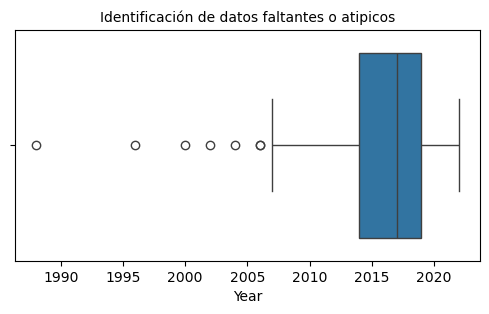

In [6]:
#idintificar datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=BD['Year'])
plt.title('Identificación de datos faltantes o atipicos',fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes o atipicos')

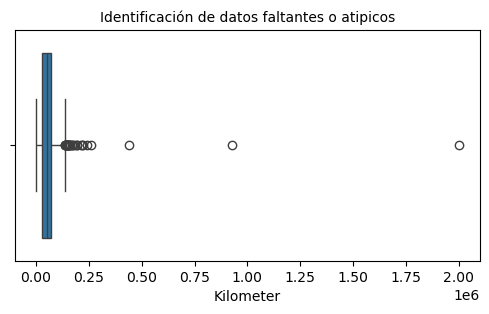

In [7]:
#idintificar datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=BD['Kilometer'])
plt.title('Identificación de datos faltantes o atipicos',fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes o atipicos')

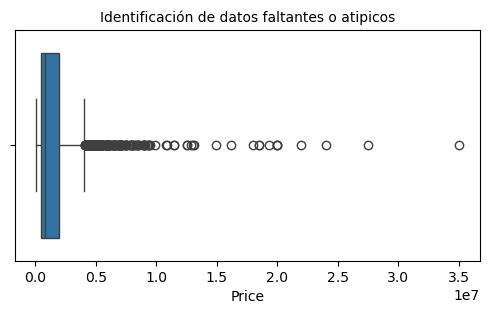

In [8]:
#idintificar datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=BD['Price'])
plt.title('Identificación de datos faltantes o atipicos',fontsize=10)

In [9]:
#revision de datos faltantes
print("Cantidad de Registros con cero en age",BD['Year'].isin([0]).sum())
print("Cantidad de Registros con cero en trestbps",BD['Price'].isin([0]).sum())



Cantidad de Registros con cero en age 0
Cantidad de Registros con cero en trestbps 0


In [10]:
#conteo de datos atipicos
nivel_minimo=0
nivel_maximo=100000
Total_Atipicos=((BD['Kilometer']<nivel_minimo)|(BD['Kilometer']>nivel_maximo)).sum()
print("el total de datos atipicos es{}".format(Total_Atipicos))

el total de datos atipicos es130


In [11]:
#convertir los modelos en un DataFrame
df= pd.DataFrame(BD)
#Variable independiente (Kilometer y year) depende de (price)
x=df[['Kilometer','Year']]
y=df['Price']
#crear un modelo de regresion lineal
modelo = LinearRegression()
#Ajustar el modelo
modelo.fit(x,y)




LinearRegression()

intercepto (β0):-422312442.433117
coeficiente (Kilometer, β1):-2.7049461327912945
coeficiente (Year, β2):210353.47933121372


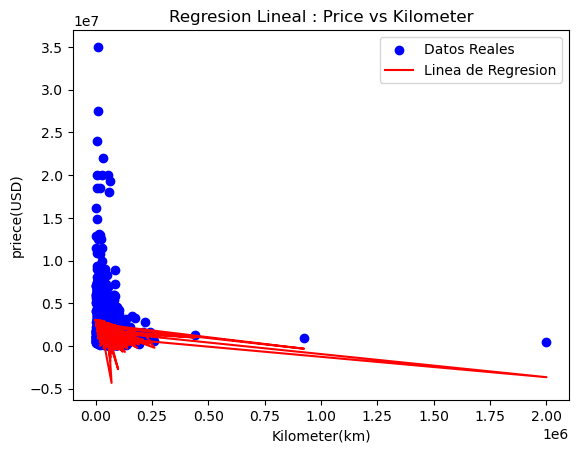

In [12]:
#coeficiente de la regrecion 
beta_0 = modelo.intercept_ #intercepto
beta_1, beta_2 = modelo.coef_ #pendientes 

#Mostrar los  coeficientes 
print(f"intercepto (β0):{beta_0}")
print(f"coeficiente (Kilometer, β1):{beta_1}")
print(f"coeficiente (Year, β2):{beta_2}")

#Visualizar regresion lineal 
plt.scatter(df['Kilometer'], y, color= 'blue',label='Datos Reales')
plt.plot(df['Kilometer'], modelo.predict(x), color = 'red', label= 'Linea de Regresion')
plt.title('Regresion Lineal : Price vs Kilometer')

plt.xlabel('Kilometer(km)')
plt.ylabel('priece(USD)')
plt.legend()
plt.show()




intercepto (β0):-422312442.433117
coeficiente (Kilometer, β1):-2.7049461327912945
coeficiente (Year, β2):210353.47933121372


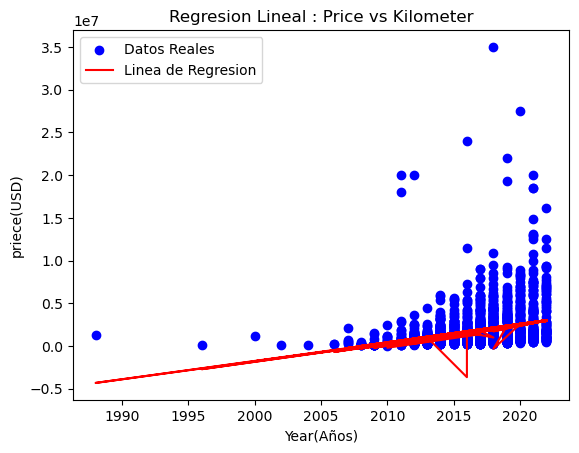

In [13]:
#coeficiente de la regrecion 
beta_0 = modelo.intercept_ #intercepto
beta_1, beta_2 = modelo.coef_ #pendientes 

#Mostrar los  coeficientes 
print(f"intercepto (β0):{beta_0}")
print(f"coeficiente (Kilometer, β1):{beta_1}")
print(f"coeficiente (Year, β2):{beta_2}")

#Visualizar regresion lineal 
plt.scatter(df['Year'], y, color= 'blue',label='Datos Reales')
plt.plot(df['Year'], modelo.predict(x), color = 'red', label= 'Linea de Regresion')
plt.title('Regresion Lineal : Price vs Kilometer')

plt.xlabel('Year(Años)')
plt.ylabel('priece(USD)')
plt.legend()
plt.show()




In [14]:
#predecir precios para dos nuevos valores 
nuevo_x =np.array([[2007, 509000],[2012, 700800]])#nuevos valores 
#mostrar las predicciones 
predicciones = modelo.predict(nuevo_x)
#mostrar predicciones 
print ("\npredicciones:")
for i, pred in enumerate(predicciones):
    print (f"Prediccion (i+1) para (Year:{nuevo_x[i][0]}Año, Kilometer:{nuevo_x[1][1]}):{pred:.2f}Km")


predicciones:
Prediccion (i+1) para (Year:2007Año, Kilometer:700800):106647603108.33Km
Prediccion (i+1) para (Year:2012Año, Kilometer:700800):146993400430.53Km


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
#importar librerias necesarias
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [16]:
x=df[['Kilometer','Year']]
y=df['Price']
#definir un modelo de regresion lineal
model = LinearRegression()
#entrenar  el modelo
model.fit(x,y)
#realizar predicciones en los datos 
predicciones = model.predict(x)
# calcular las metricas de evaluacion
r2= r2_score(y, predicciones) #coeficiente de determinacion 
mae = mean_absolute_error(y,predicciones)# error absoluto medio
mse = mean_squared_error(y, predicciones) #eeror cuadratico medio
rmse = np.sqrt(mse) # raiz del error cuadratico 

# imprimir las metricas 


In [17]:
print(f'R^2 (coeficiente de determinacion): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

R^2 (coeficiente de determinacion): 0.10071937455974678
Error Absoluto Medio (MAE): 1345814.9081414114


8. Interpretar, analizar y documentar los resultados obtenidos. 

R^2: se evidencia que el porsentaje de variablilidad  de la variable dependiente (price) esta explicada por las variables independientes (Kilometer y year). un Valor de R^2 = 0.100 que indica que la variable price esta explicada por la variable kilometer y por la variable year
MAE: el error promedio esta 1345814 del valor real
